# Investigation into FULL PLAYER DATASET obtained from basketball-reference.com

Will try analyse the full player database to achieve the same kinds of columns/variables as I produced manually above using a hand-made dataset...

### Import full player stat dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the downloaded Players.csv into a Pandas dataframe
players = pd.read_csv("Players.csv")

In [3]:
del players['Unnamed: 0']
players.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


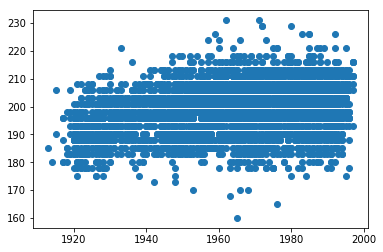

In [4]:
plt.scatter(players['born'], players['height'])

In [5]:
# load the FULL stats file (downloaded from Kaggle)
full_stats = pd.read_csv('Seasons_Stats.csv')

In [6]:
del full_stats['Unnamed: 0']
full_stats.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [7]:
# check on the data types in the dataframe
type(full_stats)
full_stats.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

### Merge the df's 'players' and 'full_stats' on players name

In [8]:
players_and_stats = pd.merge(players, full_stats, on='Player', how='right')

In [9]:
players_and_stats.head(15)

,Player,height,weight,collage,born,birth_city,birth_state,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1950.0,G-F,31.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1951.0,G-F,32.0,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,SG,29.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1951.0,SG,30.0,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1952.0,SG,31.0,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0
5,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,SF,25.0,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
6,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1951.0,SF,26.0,...,0.689,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0
7,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1952.0,SF,27.0,...,0.652,NaN,NaN,430.0,255.0,NaN,NaN,NaN,196.0,820.0
8,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1953.0,SF,28.0,...,0.629,NaN,NaN,483.0,277.0,NaN,NaN,NaN,245.0,967.0
9,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1954.0,F-G,29.0,...,0.716,NaN,NaN,297.0,226.0,NaN,NaN,NaN,203.0,461.0


In [10]:
# There are 58(?) columns in this df -- what are all the columns?
list(players_and_stats)

['Player',
 'height',
 'weight',
 'collage',
 'born',
 'birth_city',
 'birth_state',
 'Year',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'blanl',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'blank2',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [11]:
# 'blank2'  and 'blanl' cols appear to be just all NaN -- delete them
print players_and_stats['blanl'].head()
print players_and_stats['blanl'].tail()

del players_and_stats['blank2']
del players_and_stats['blanl']

SyntaxError: invalid syntax (<ipython-input-11-a6621937dbf2>, line 2)

## Do some plotting of this dataset to get a feel for it

In [12]:
grouped_player = players_and_stats.groupby(['Player'])['FG%', 'height'].mean()
#grouped_player.mean()
grouped_player.tail(20)

,FG%,height
Player,,
Yogi Ferrell,0.395000,183.0
York Larese,0.405000,193.0
Yuta Tabuse,0.167000,175.0
Yvon Joseph,NaN,211.0
Zabian Dowdell,0.408000,190.0
Zach LaVine,0.444333,196.0
Zach Randolph,0.469167,206.0
Zaid Abdul-Aziz,0.399500,206.0
Zan Tabak,0.481375,213.0


In [13]:
# Set FG% values that are 1.0 and 0.0 to NaN, as these are unrealistic

grouped_player.loc[grouped_player['FG%'] == 0.0,'FG%'] = np.NaN
grouped_player.loc[grouped_player['FG%'] == 1.0,'FG%'] = np.NaN

# just a check to see if operation worked
'''count = 0
for val in grouped_player['FG%']:
    if val == 0.0:
        count +=1
print count'''

"count = 0\nfor val in grouped_player['FG%']:\n    if val == 0.0:\n        count +=1\nprint count"

In [14]:
grouped_player.describe()

,FG%,height
count,3834.000000,3921.000000
mean,0.408006,198.704922
std,0.085311,9.269761
min,0.056000,160.000000
25%,0.363333,190.000000
50%,0.415823,198.000000
75%,0.458489,206.000000
max,0.850000,231.000000


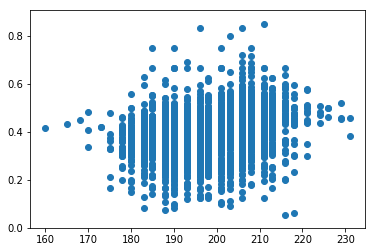

In [15]:
plt.scatter(grouped_player['height'], grouped_player['FG%'])

## Look at 'modern NBA' (from 1985 on) only

In [16]:
modern_stats = players_and_stats.loc[lambda players_and_stats: players_and_stats.Year >= 1985.0, :]

In [17]:
modern_stats.describe()

,height,weight,born,Year,Age,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17095.000000,17025.000000,...,16395.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000
mean,200.287895,97.210351,1972.629766,2002.224678,26.920292,48.948596,23.374444,1144.393918,12.369348,0.503499,...,0.721710,57.996374,142.013333,200.009708,107.438012,37.733626,23.622456,69.631462,104.836023,474.306550
std,9.606832,12.646753,11.871131,9.318747,4.060960,26.614972,28.492664,921.536847,6.304870,0.096098,...,0.148596,64.531864,140.750146,199.639577,136.365381,37.144358,35.831814,64.744795,78.857949,472.964315
min,160.000000,60.000000,1920.000000,1985.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.000000,88.000000,1964.000000,1995.000000,24.000000,25.000000,0.000000,299.000000,9.600000,0.472000,...,0.658000,11.000000,31.000000,44.000000,16.000000,8.000000,3.000000,17.000000,33.000000,90.000000
50%,201.000000,97.000000,1973.000000,2003.000000,26.000000,53.000000,8.000000,958.000000,12.600000,0.516000,...,0.750000,34.000000,103.000000,142.000000,58.000000,27.000000,11.000000,52.000000,95.000000,325.000000
75%,208.000000,106.000000,1982.000000,2010.000000,30.000000,74.000000,45.000000,1863.000000,15.600000,0.552000,...,0.815000,84.000000,207.000000,290.000000,145.000000,56.000000,29.000000,106.000000,164.000000,731.000000
max,231.000000,163.000000,1997.000000,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,...,1.000000,523.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,371.000000,3041.000000


### As this code was pulled from basketball-reference.com, can I write a function to actually FIND the traded players in the dataset?

i.e., "if player_name has two (or more) entries in the same year, then he must have changed teams that year"

In [18]:
# am trying to groupby the data into PLAYERS, then check to see if the data for each PLAYER 
# contains any double-ups in the YEAR column.

# grouped_players = modern_stats.groupby(['Player'])
sorted_players = modern_stats.sort_values(by=['Player'])

In [19]:
sorted_players.head(20)

,Player,height,weight,collage,born,birth_city,birth_state,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10056,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1990.0,PF,26.0,...,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
10064,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1997.0,PF,33.0,...,0.646,33.0,105.0,138.0,17.0,18.0,1.0,20.0,34.0,153.0
10063,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1997.0,PF,33.0,...,0.650,222.0,434.0,656.0,69.0,70.0,16.0,74.0,145.0,597.0
10066,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1998.0,PF,34.0,...,0.716,219.0,449.0,668.0,123.0,78.0,27.0,68.0,157.0,600.0
10067,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1999.0,PF,35.0,...,0.577,82.0,146.0,228.0,25.0,28.0,8.0,19.0,69.0,246.0
10062,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1996.0,SF,32.0,...,0.709,166.0,388.0,554.0,72.0,45.0,23.0,79.0,141.0,612.0
10061,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1995.0,SF,31.0,...,0.732,194.0,475.0,669.0,127.0,55.0,31.0,114.0,146.0,916.0
10060,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1994.0,PF,30.0,...,0.735,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0
10059,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1993.0,PF,29.0,...,0.739,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
10058,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,1992.0,PF,28.0,...,0.744,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0


### Write code to make dictionary of players and the years they were active


In [20]:
# may need to use 'defaultdict' to add initialize the empty list as the dict value
from collections import defaultdict

# try loop through this df to sort out double-ups in years...
players_active_years = defaultdict(list)

for index, row in modern_stats.iterrows():
    players_active_years[row['Player']].append(row['Year'])

In [21]:
players_active_years

defaultdict(list,
            {'Jim Paxson': [1985.0,
              1986.0,
              1987.0,
              1988.0,
              1988.0,
              1988.0,
              1989.0,
              1990.0],
             'Hot Rod': [1987.0,
              1988.0,
              1989.0,
              1990.0,
              1991.0,
              1992.0,
              1993.0,
              1994.0,
              1995.0,
              1996.0,
              1997.0,
              1998.0,
              1999.0],
             'Luke Jackson': [2005.0, 2006.0, 2007.0, 2007.0, 2007.0, 2008.0],
             'Greg Smith': [2012.0, 2013.0, 2014.0, 2015.0, 2016.0],
             'Sam Williams': [1985.0],
             'Kareem Abdul-Jabbar*': [1985.0, 1986.0, 1987.0, 1988.0, 1989.0],
             'Jo Jo': [1993.0, 1994.0, 1995.0],
             'George Johnson': [1985.0, 1985.0, 1986.0, 1986.0],
             'Bob McAdoo*': [1985.0, 1986.0],
             'Kermit Washington': [1988.0],
             'Harvey Cat

### Now need to loop through the dict values (lists) to find double-ups in the years

In [23]:
from collections import Counter

# loop through active years for players in dict 'players_active_years'
traded_player_dict = defaultdict(list)

for player, years in players_active_years.items():   # note: change to .items() for python 3.
    
    # use the 'Counter()' method from Collections to track years that are doubled-up in the 'years' list
    traded_player_dict[player] = [year for year, count in Counter(years).items() if count > 1]
    
    # remove any players that don't have year double-ups...
    if not traded_player_dict[player]:  # this uses the inherent Boolean nature of the list obj directly!
        del traded_player_dict[player]

In [24]:
traded_player_dict

defaultdict(list,
            {'Jim Paxson': [1988.0],
             'Luke Jackson': [2007.0],
             'George Johnson': [1985.0, 1986.0],
             'Darryl Dawkins': [1988.0],
             'Adrian Dantley*': [1989.0],
             'Johnny Davis': [1986.0],
             'Mike Dunleavy': [2007.0, 2017.0],
             'Artis Gilmore*': [1988.0],
             'Bobby Jones': [2008.0],
             'Billy Knight': [1985.0],
             'Walter Davis': [1991.0],
             'James Edwards': [1988.0],
             'Rickey Green': [1989.0],
             'Eddie Johnson': [1985.0, 1986.0, 1987.0, 1991.0, 1997.0],
             'Cedric Maxwell': [1987.0],
             'Ben Poquette': [1987.0],
             'Robert Reid': [1990.0],
             'Ray Williams': [1986.0],
             'Ron Brewer': [1985.0, 1986.0],
             'Maurice Cheeks': [1990.0],
             'John Long': [1989.0],
             'Mychal Thompson': [1987.0],
             'Jerome Whitehead': [1989.0],
             'D

In [25]:
len(traded_player_dict)

1041

Therefore, the number of players that have been traded in-season in our dataset is 1041!

## Now need to go back to the original dataframe ('modern_stats') and extract the rows for these players in the year(s) that they changed teams...

In [26]:
# to do